<a href="https://colab.research.google.com/github/praween124/Client/blob/master/Issue_of_outliers_in_all_the_continuous_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create function for input

2) Write a python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.

Things to consider:

· It’s up to you on how you want to deal with outliers. You can either remove them or impute them.

· We consider outliers as incorrect entries and not the one which are natural. For example, in the salary column, if there is a value of $1,000,000 then this value can be due to a natural cause (like it’s a salary for a CEO) or it can be a case of incorrect entry (like someone put an extra zero). So, we are only after incorrect entries.

· Function should also identify which columns are continuous so that you can perform outlier removal on these columns

· The code must be very fast so you cannot use multivariate approach which are based on distance calculation between all points.

· Code should be well commented and easy to interpret

· Use google Colab

· Code should be robust enough to run on any dataset and the dataset on which we will test will not be a perfect dataset as in the case of real world

· Make a dummy dataset by yourself or pass any publicly available dataset to test out your logic

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
emp = {'ID': [1,2,3,4,5,6,7,8,9,10],
      'Name': ['Pratap', 'Rajesh', 'Rohan', 'Ramesh', 'Sonam', 'Mukesh', 'Ayush', 'Nitish', 'Vijay', 'Arbind'],
      'Sallary': [20000, 300000, 35000, 45000, 25000, 550000, 63000, 37000, 42000, 45000]}
df = pd.DataFrame(emp)

In [20]:
df.shape

(10, 3)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10 non-null     int64 
 1   Name     10 non-null     object
 2   Sallary  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [22]:
df.isnull().sum()

ID         0
Name       0
Sallary    0
dtype: int64

In [23]:
df

,ID,Name,Sallary
0,1,Pratap,20000
1,2,Rajesh,300000
2,3,Rohan,35000
3,4,Ramesh,45000
4,5,Sonam,25000
5,6,Mukesh,550000
6,7,Ayush,63000
7,8,Nitish,37000
8,9,Vijay,42000
9,10,Arbind,45000


[Text(0.5, 0, 'Sallary')]

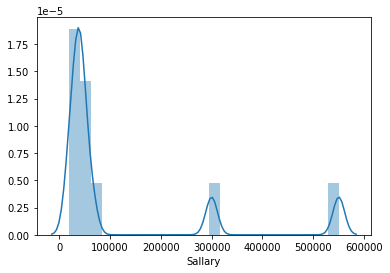

In [25]:
aa = sns.distplot(df['Sallary'])

aa.set(xlabel ='Sallary') 

In [26]:
for i in range(len(df['Sallary'])):
    print(df['Sallary'][i] > 100000)

False
True
False
False
False
True
False
False
False
False


In [27]:
for i in range(len(df['Sallary'])):
    miss_values = df['Sallary'][i] > 100000
    if miss_values == True:
        print(df['Sallary'][i])

300000
550000


In [28]:
# extra zero

for i in range(len(df['Sallary'])):
    miss_values = df['Sallary'][i] > 100000
    if miss_values == True:
#         print(f"Possition-{i+1}   {df['Sallary'][i]}")
        n=int(df['Sallary'][i])
        count=0
        while(n>0):
            count=count+1
            n=n//10
#         print(f"The number of digits in the number are: {df['Sallary'][i]} - {count}")
        df['Sallary'][i] = df['Sallary'][i]//10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [29]:
df

,ID,Name,Sallary
0,1,Pratap,20000
1,2,Rajesh,30000
2,3,Rohan,35000
3,4,Ramesh,45000
4,5,Sonam,25000
5,6,Mukesh,55000
6,7,Ayush,63000
7,8,Nitish,37000
8,9,Vijay,42000
9,10,Arbind,45000


[Text(0.5, 0, 'Average')]

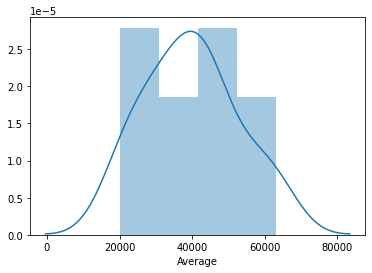

In [30]:
# After modify data frame graph

aa = sns.distplot(df['Sallary'])

aa.set(xlabel ='Average') 